# Digit Recognizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow import keras
from sklearn.utils import resample

import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from keras import datasets, layers, models
from keras.layers import Dense , Conv2D,MaxPooling2D,Flatten,Dropout 


# Original train.csv

In [2]:
# Load train data set
dfdg = pd.read_csv('train.csv')
print(dfdg.shape)

y = dfdg['label']
X = dfdg.drop('label',axis=1)
print(X.shape, y.shape)

(42000, 785)
(42000, 784) (42000,)


In [3]:
# Split train and test data
train_images_1, test_images_1, train_labels_1, test_labels_1 = train_test_split(X, y, test_size=0.1, random_state=11)
print(train_images_1.shape, test_images_1.shape)
print(train_labels_1.shape, test_labels_1.shape)

(37800, 784) (4200, 784)
(37800,) (4200,)


In [4]:
train_images_1 = train_images_1.values
train_labels_1 = train_labels_1.values
test_images_1 = test_images_1.values
test_labels_1 = test_labels_1.values

In [5]:
# reshape & Normalization
train_images_1 = train_images_1.reshape((37800, 28, 28, 1))
test_images_1 = test_images_1.reshape((4200, 28, 28, 1))
train_images_1, test_images_1 = train_images_1 / 255.0, test_images_1 / 255.0 

# MINST 60000

In [6]:
# Load MINST data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [7]:
# reshape and Normalization
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0 

In [8]:
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [9]:
print(train_images_1.shape, test_images_1.shape)
print(train_labels_1.shape, test_labels_1.shape)

(37800, 28, 28, 1) (4200, 28, 28, 1)
(37800,) (4200,)


In [10]:
train_images = np.concatenate((train_images, train_images_1), axis=0)
test_images = np.concatenate((test_images, test_images_1), axis=0)
train_labels = np.concatenate((train_labels, train_labels_1), axis=0)
test_labels = np.concatenate((test_labels, test_labels_1), axis=0)

In [11]:
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(97800, 28, 28, 1) (14200, 28, 28, 1)
(97800,) (14200,)


# Load wrong digital

Upsampling more digitals which were not correctly predicted in several attempts.

In [12]:
w1 = pd.read_csv('wrong1_normalized.csv')
w2 = pd.read_csv('wrong2_normalized_2.csv')
w3 = pd.read_csv('wrong3_normalized_2.csv')
w4 = pd.read_csv('wrong4_normalized.csv')
w5 = pd.read_csv('wrong5_normalized.csv')
w6 = pd.read_csv('wrong6_normalized.csv')
w7 = pd.read_csv('wrong7_normalized.csv')
w8 = pd.read_csv('wrong8_normalized.csv')
w1 = pd.concat([w1,w2])
w3 = pd.concat([w3,w4])
w5 = pd.concat([w5,w6])
w7 = pd.concat([w7,w8])
wrong = pd.concat([w1,w3])
wrong = pd.concat([wrong,w5])
wrong = pd.concat([wrong,w7])

In [13]:
# Up-Sampling
df_upsampling = pd.DataFrame()

# Upsampling of
df_upsampling = resample(wrong[wrong['label']==0], replace=True, n_samples=2000, random_state=11)
df_upsampling1 = resample(wrong[wrong['label']==1], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==2], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==3], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==4], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==5], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==6], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==7], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==8], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])
df_upsampling1 = resample(wrong[wrong['label']==9], replace=True, n_samples=2000, random_state=11)
df_upsampling = pd.concat([df_upsampling, df_upsampling1])

# Display all
df_upsampling['label'].value_counts()

9    2000
8    2000
7    2000
6    2000
5    2000
4    2000
3    2000
2    2000
1    2000
0    2000
Name: label, dtype: int64

In [14]:
yw = df_upsampling['label']
Xw = df_upsampling.drop(['label','pred','correct'],axis=1)

In [15]:
# Split train and test data
train_images_1, test_images_1, train_labels_1, test_labels_1 = train_test_split(Xw, yw, test_size=0.1, random_state=11)
print(train_images_1.shape, test_images_1.shape)
print(train_labels_1.shape, test_labels_1.shape)

(18000, 784) (2000, 784)
(18000,) (2000,)


In [16]:
train_images_1 = train_images_1.values
train_labels_1 = train_labels_1.values
test_images_1 = test_images_1.values
test_labels_1 = test_labels_1.values

In [17]:
# reshape
train_images_1 = train_images_1.reshape((18000, 28, 28, 1))
test_images_1 = test_images_1.reshape((2000, 28, 28, 1))

In [18]:
print(train_images_1.shape, test_images_1.shape)
print(train_labels_1.shape, test_labels_1.shape)

(18000, 28, 28, 1) (2000, 28, 28, 1)
(18000,) (2000,)


In [19]:
train_images = np.concatenate((train_images, train_images_1), axis=0)
test_images = np.concatenate((test_images, test_images_1), axis=0)
train_labels = np.concatenate((train_labels, train_labels_1), axis=0)
test_labels = np.concatenate((test_labels, test_labels_1), axis=0)

In [20]:
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(115800, 28, 28, 1) (16200, 28, 28, 1)
(115800,) (16200,)


# Previous CNN Model

## Previous Model - Submission Accuracy 99.15%
#### model = models.Sequential()
#### model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(28,28,1)))
#### model.add(layers.MaxPool2D(2, 2))
#### model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#### model.add(layers.MaxPool2D(2, 2))
#### model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#### model.add(layers.Flatten())
#### model.add(Dropout(0.4))
#### model.add(layers.Dense(128, activation='relu'))
#### model.add(Dropout(0.4))
#### model.add(layers.Dense(10, activation='softmax'))

# Final CNN Model - Submission Accuaracy 99.953%

In [81]:
input_shape = (28, 28, 1)
model = models.Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))  # Convolution Layer -1 
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))                          # Convolution Layer -2 
model.add(MaxPool2D((2, 2)))                                                         # Pooling Layer -1
model.add(BatchNormalization())                                                      # Normalization 
model.add(Dropout(0.25))                                                             # Set 25% to 0 to prevent overfitting 

model.add(Conv2D(filters = 128, kernel_size = (3,3),activation ='relu'))             # Convolution Layer -3 
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation ='relu'))             # Convolution Layer -4 
model.add(MaxPool2D(pool_size=(2,2)))                                                # Pooling Layer -2 
model.add(BatchNormalization())                                                      # Normalization
model.add(Conv2D(filters = 256, kernel_size = (3,3),activation ='relu'))             # Convolution Layer -5 
model.add(MaxPool2D(pool_size=(2,2)))                                                # Pooling Layer -3 
model.add(Dropout(0.25))                                                             # Set 25% to 0 to prevent overfitting

model.add(Flatten())                                                                 # Flattens input
model.add(BatchNormalization())                                                      # Normalization
model.add(Dense(512, activation = "relu"))                                           # Connection Layer -1 
model.add(Dropout(0.5))                                                              #  Set 50% to 0 to prevent overfitting
model.add(Dense(10, activation = "softmax"))                                         # Connection Layer -2 

In [82]:
# print a useful summary of the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_51 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 8, 8, 128)       

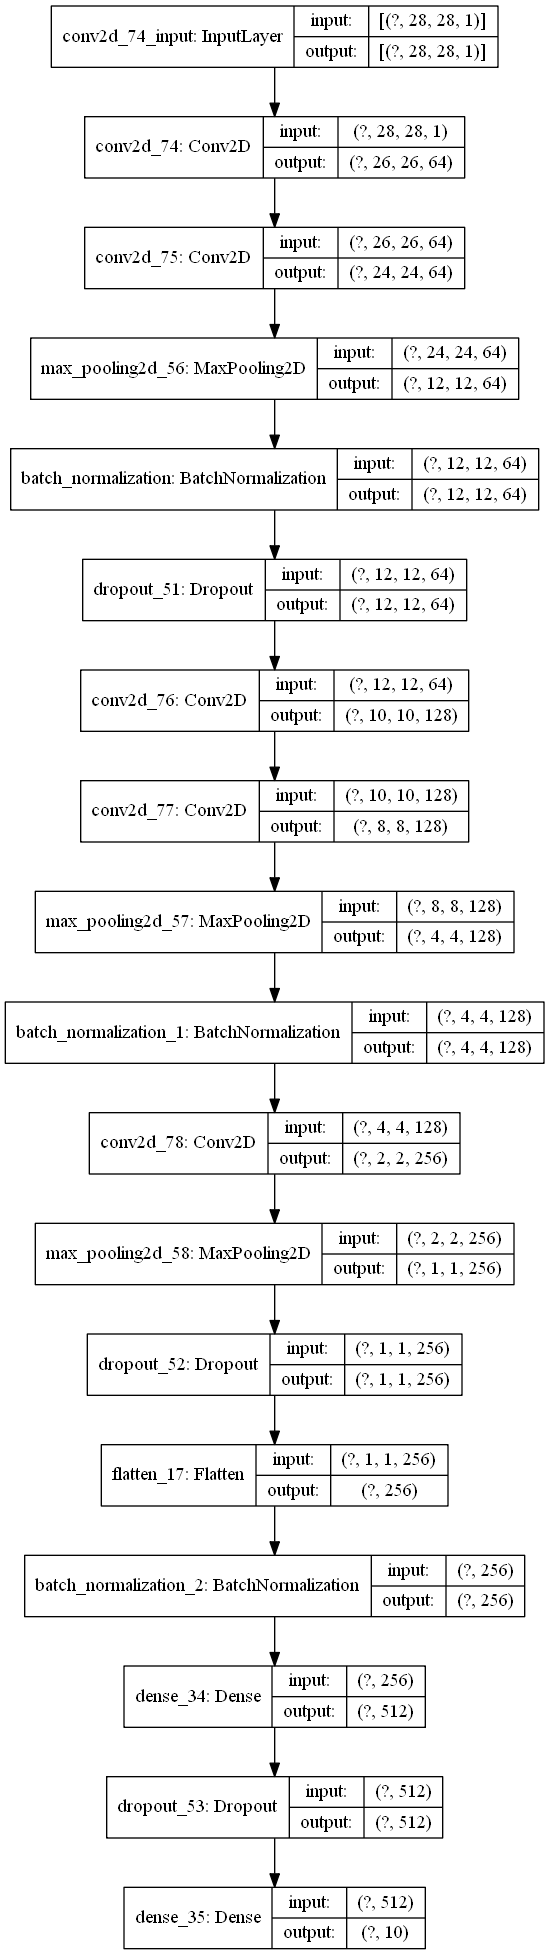

In [91]:
# Model Plot
keras.utils.plot_model(model, "final_model_with_shape_info.png", show_shapes=True)

In [84]:
# Compile all layers
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# Define Callback function for reducting learning rate when no more improvement of accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.0001)


In [86]:
# Fit train&test data
epochs_range = 60
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels,batch_size=256,epochs=epochs_range,validation_data=(test_images, test_labels),callbacks=learning_rate_reduction )

Epoch 1/60
453/453 [==============================] - 1030s 2s/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0143 - val_accuracy: 0.9956
Epoch 2/60
453/453 [==============================] - 1121s 2s/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.0108 - val_accuracy: 0.9965
Epoch 3/60
453/453 [==============================] - 1130s 2s/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.0460 - val_accuracy: 0.9886
Epoch 4/60
453/453 [==============================] - 1108s 2s/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0104 - val_accuracy: 0.9973
Epoch 5/60
453/453 [==============================] - 1104s 2s/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0088 - val_accuracy: 0.9978
Epoch 6/60
453/453 [==============================] - 1110s 2s/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0127 - val_accuracy: 0.9973
Epoch 7/60
453/453 [==============================] - 1136s 3s/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0089 - val_accuracy:

Epoch 55/60
453/453 [==============================] - 828s 2s/step - loss: 1.0230e-04 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9991
Epoch 56/60
453/453 [==============================] - 824s 2s/step - loss: 2.1974e-04 - accuracy: 0.9999 - val_loss: 0.0077 - val_accuracy: 0.9990
Epoch 57/60
453/453 [==============================] - 919s 2s/step - loss: 1.4069e-04 - accuracy: 0.9999 - val_loss: 0.0075 - val_accuracy: 0.9991
Epoch 58/60
453/453 [==============================] - 832s 2s/step - loss: 6.3597e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9991
Epoch 59/60
453/453 [==============================] - 832s 2s/step - loss: 1.3564e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9990
Epoch 60/60
453/453 [==============================] - 827s 2s/step - loss: 4.8535e-05 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9992


In [87]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print("Test Accuracy: ", test_acc)
print("Test loss:", test_loss)

507/507 - 27s - loss: 0.0072 - accuracy: 0.9992
Test Accuracy:  0.9991975426673889
Test loss: 0.007174915634095669


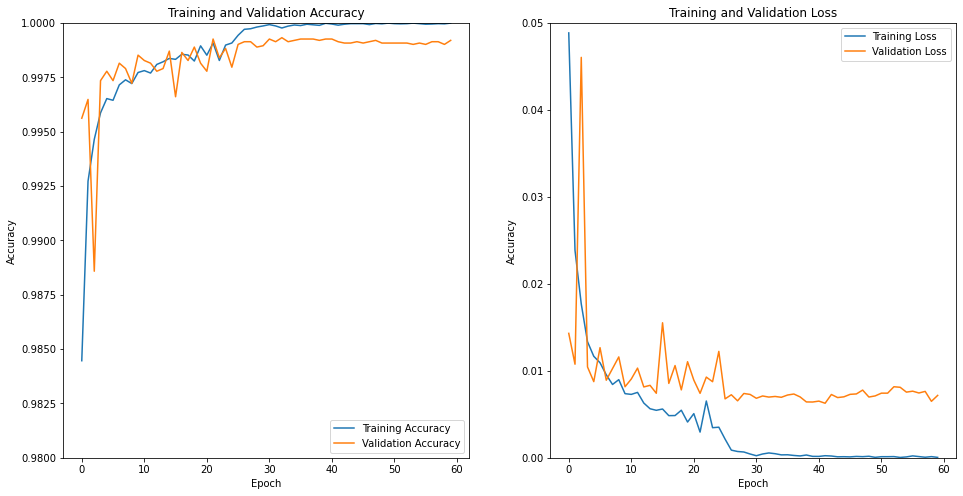

In [88]:
# Accuracy plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

e_range = range(epochs_range)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(e_range, acc, label='Training Accuracy')
plt.plot(e_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim([0.98, 1])

plt.subplot(1, 2, 2)
plt.plot(e_range, loss, label='Training Loss')
plt.plot(e_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.ylim([0.00, 0.05])
plt.show()

In [89]:
# Save trained Model to lib
model.save('trained_cnn_model_20201012_01_099919.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: trained_cnn_model_20201012_01_099919.model\assets


In [90]:
# Predict and generate Submission file
df_t = pd.read_csv('test.csv')
X_t = df_t.values
X_t = X_t.reshape((28000, 28, 28, 1))
X_t = X_t/255.0
predictions = model.predict_classes(X_t, verbose=0)
#predictions = model.predict_classes(X_t, verbose=0)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("submission21_predictions_cnn.csv", index=False, header=True)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
